In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os

%matplotlib inline

In [2]:
# imports

# scale the data
from sklearn.preprocessing import MinMaxScaler

# create the timeseries generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

In [5]:
df = pd.read_csv('/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/DATA/energydata_complete.csv',
                 parse_dates=True, index_col='date')
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non

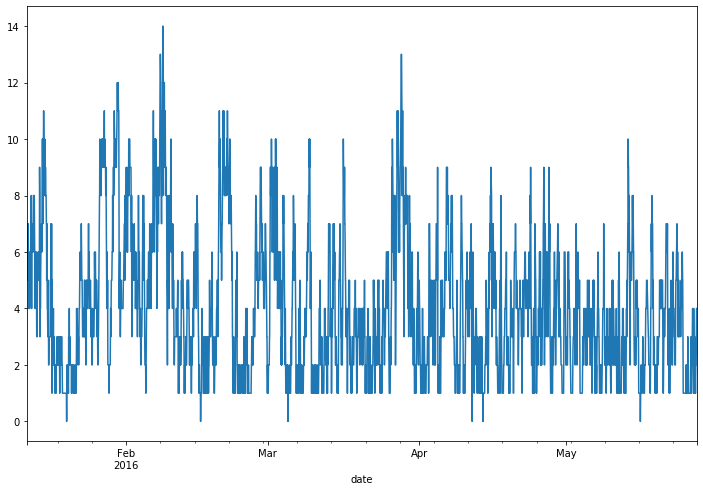

In [7]:
df['Windspeed'].plot(figsize=(12,8))

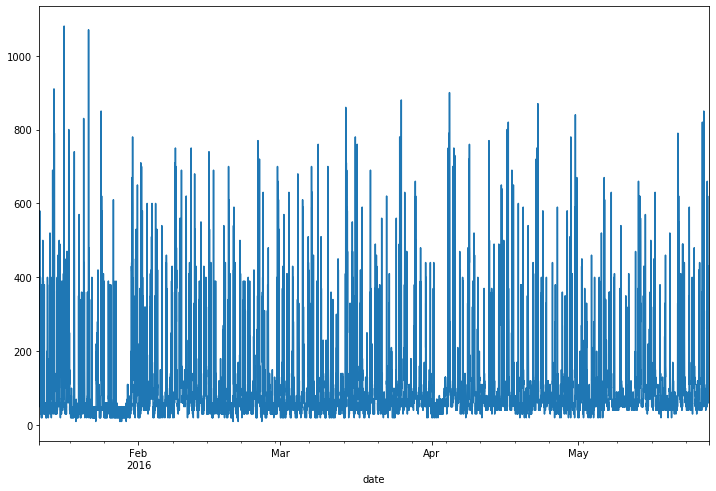

In [8]:
df['Appliances'].plot(figsize=(12,8))

In [9]:
len(df)

19735

In [10]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [11]:
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [12]:
# forecast 24 hours into future

df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [13]:
df = df.loc['2016-05-01':]

In [14]:
df = df.round(2)

len(df)

3853

In [15]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [16]:
test_days = 2

In [17]:
test_ind = test_days*144

In [18]:
test_ind

288

In [19]:
# Notice the minus sign in our indexing

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [20]:
scaler = MinMaxScaler()

In [21]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [24]:
# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [25]:
len(scaled_train)

3565

In [26]:
len(generator) 

3421

In [27]:
# What does the first batch look like?
X,y = generator[0]

In [28]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [29]:
# get the shape
scaled_train.shape

(3565, 28)

In [30]:
scaled_train.shape[1]

28

In [31]:
# define model
model = Sequential()

# Simple RNN layer, shape is no longer 1 using the full 28 features
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               51600     
_________________________________________________________________
dense (Dense)                (None, 28)                2828      
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [33]:
# early stop
early_stop = EarlyStopping(monitor='val_loss',patience=3)

# validation generator
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [34]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10
3421/3421 [==============================] - 1245s 364ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 2/10
3421/3421 [==============================] - 1238s 362ms/step - loss: 0.0079 - val_loss: 0.0088
Epoch 3/10
3421/3421 [==============================] - 1238s 362ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 4/10
3421/3421 [==============================] - 1245s 364ms/step - loss: 0.0073 - val_loss: 0.0084
Epoch 5/10
3421/3421 [==============================] - 1229s 359ms/step - loss: 0.0073 - val_loss: 0.0080
Epoch 6/10
3421/3421 [==============================] - 1276s 373ms/step - loss: 0.0072 - val_loss: 0.0083
Epoch 7/10
3421/3421 [==============================] - 1311s 383ms/step - loss: 0.0071 - val_loss: 0.0084
Epoch 8/10
3421/3421 [==============================] - 1312s 383ms/step - loss: 0.0071 - val_loss: 0.0081


In [35]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

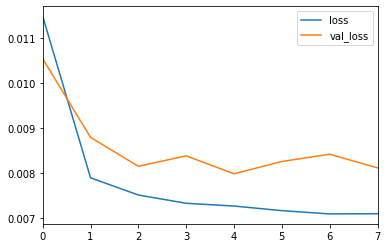

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [37]:
first_eval_batch = scaled_train[-length:]

In [38]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [39]:
# need to get the 28 feature columns

first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [40]:
model.predict(first_eval_batch)

array([[ 1.0715255e-01, -4.9909577e-05,  6.7925769e-01,  3.8611341e-01,
         5.4759222e-01,  4.3757737e-01,  4.2421371e-01,  4.0697789e-01,
         7.2415459e-01,  3.9729628e-01,  2.8720438e-01,  3.4986925e-01,
         6.6469568e-01, -5.5748522e-03,  6.3084942e-01,  3.7811285e-01,
         5.2902716e-01,  3.3147055e-01,  5.4008085e-01,  3.5335189e-01,
         6.1466378e-01,  5.1925707e-01,  4.1465443e-01,  2.1592721e-01,
         6.2426949e-01,  5.2499902e-01,  5.0845987e-01,  5.0406671e-01]],
      dtype=float32)

In [41]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [42]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [43]:
test_predictions

[array([ 1.0715255e-01, -4.9909577e-05,  6.7925769e-01,  3.8611341e-01,
         5.4759222e-01,  4.3757737e-01,  4.2421371e-01,  4.0697789e-01,
         7.2415459e-01,  3.9729628e-01,  2.8720438e-01,  3.4986925e-01,
         6.6469568e-01, -5.5748522e-03,  6.3084942e-01,  3.7811285e-01,
         5.2902716e-01,  3.3147055e-01,  5.4008085e-01,  3.5335189e-01,
         6.1466378e-01,  5.1925707e-01,  4.1465443e-01,  2.1592721e-01,
         6.2426949e-01,  5.2499902e-01,  5.0845987e-01,  5.0406671e-01],
       dtype=float32),
 array([ 0.10485974,  0.00145982,  0.66862947,  0.37963295,  0.55505854,
         0.4306939 ,  0.42615008,  0.39036793,  0.72554415,  0.38001826,
         0.28442702,  0.32992542,  0.66210955, -0.01790147,  0.63787085,
         0.35944343,  0.54443693,  0.33841053,  0.54785943,  0.35714942,
         0.6125896 ,  0.5176875 ,  0.39565647,  0.23191912,  0.6659543 ,
         0.5029751 ,  0.5046811 ,  0.5069629 ], dtype=float32),
 array([ 0.10903916, -0.00133542,  0.661328

In [44]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

# Inverse Transformations and Compare

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 1.02507465e+02, -1.49728730e-03,  2.43772426e+01, ...,
         7.47248348e+00,  2.54177395e+01,  2.51982133e+01],
       [ 1.00741999e+02,  4.37946618e-02,  2.43148550e+01, ...,
         7.10027930e+00,  2.52289151e+01,  2.53429359e+01],
       [ 1.03960151e+02, -4.00624797e-02,  2.42720004e+01, ...,
         6.78239879e+00,  2.52094003e+01,  2.52895771e+01],
       ...,
       [-1.18639476e+02, -2.32331827e+00,  2.55337322e+01, ...,
         9.17794532e-01,  3.31561662e+01,  3.00652679e+01],
       [-1.17645205e+02, -2.32308134e+00,  2.55603772e+01, ...,
         9.69448313e-01,  3.31310400e+01,  3.00202339e+01],
       [-1.16534074e+02, -2.32157841e+00,  2.55896796e+01, ...,
         1.02673250e+00,  3.31047731e+01,  2.99717776e+01]])

In [46]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [47]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [48]:
true_predictions.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,102.507465,-0.001497,24.377243,37.696036,24.218475,35.175727,25.128886,36.470022,24.269082,37.476410,...,22.016437,37.514203,16.697796,755.939061,55.513737,2.159272,42.456169,7.472483,25.417740,25.198213
1,100.741999,0.043795,24.314855,37.516851,24.311580,34.944236,25.142712,36.155761,24.278809,37.095603,...,22.058441,37.596571,16.647186,755.903275,54.069891,2.319191,44.957258,7.100279,25.228915,25.342936
2,103.960151,-0.040062,24.272000,37.363404,24.378303,34.657169,25.137979,35.908580,24.286065,36.774169,...,22.102077,37.715587,16.611501,755.890253,52.729560,2.452176,47.296280,6.782399,25.209400,25.289577
3,108.177840,-0.132221,24.234129,37.202447,24.434393,34.345009,25.113307,35.672019,24.291943,36.485398,...,22.138459,37.820389,16.563218,755.917456,51.485599,2.564313,49.443588,6.483245,25.174889,25.227485
4,112.232003,-0.206601,24.200498,37.045570,24.482366,34.036901,25.073936,35.450811,24.298547,36.219670,...,22.169524,37.914352,16.506207,755.982524,50.360594,2.661137,51.404462,6.197794,25.154865,25.181671
